In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pcapng
from pcapng import FileScanner
import os
from IPython.display import display, clear_output
import time

In [2]:
path = input('Please specify the path to your Wireshark capture file: ')

Please specify the path to your Wireshark capture file:  C:/Users/brett/OneDrive/Code/Python/OIR Lab/Pause_onskyph0pe_ima0pe__20230426_040905.pcapng


In [3]:
print(path)

C:/Users/brett/OneDrive/Code/Python/OIR Lab/Pause_onskyph0pe_ima0pe__20230426_040905.pcapng


In [4]:
# Declares the list that will hold the hexadecimal data for each packet.

###########################################################
#path = "C:/Users/brett/OneDrive/Code/Python/OIR Lab/Pause_onskyph0pe_ima0pe__20230426_040905.pcapng"
# Specifies the path to the file to be used in processing.
# Don't forget to change when using a new file.
###########################################################

packet_array = []
# Declares the list that will hold the hexadecimal data for each packet.

with open(path, 'rb') as file:
    scanner = FileScanner(file)
    for block in scanner:
        if isinstance(block, pcapng.blocks.EnhancedPacket):
            # Checks, while iterating over each block, if it is of the EnchancedPacket data type. If so,
            # its hexadecimal packet data is stored in 'packet_array'.
            
            packet = block.packet_data
            hex_data = packet.hex()
            packet_array.append(hex_data)

In [5]:
#file_packet_integer_data = []

#for element in packet_array:
#    file_packet_integer_data.append(isolate_packet_pixel_data(element))

In [6]:
class Image:
    def __init__(self, name, number, source_ip, data):
        self.name = name
        self.number = number
        self.source_ip = source_ip
        self.data = data

In [7]:
from functions import separated_hex_values
from functions import hexadecimal_to_decimal
from functions import decimal_converted_packet
from functions import isolate_packet_pixel_data
from functions import isolate_packet_data
from functions import convert_integer_to_binary
from functions import convert_packet_array_to_8bit_binary
from functions import convert_integer_to_binary
from functions import convert_packet_array_to_8bit_binary
from functions import concatenate_pixel_data_streams
from functions import convert_16bit_binary_to_integer
from functions import concatenate_streams_and_convert_to_integer
from functions import row_splitter
from functions import get_image_source_ip

file_packet_intensity_data = []
image_list = []
object_list = []

counter = 0

for packet in packet_array:
    file_packet_intensity_data.append(row_splitter(packet))
    image_list.append('image'+str(counter))
    image_object = Image('image'+str(counter), counter, get_image_source_ip(packet), file_packet_intensity_data[counter])
    object_list.append(image_object)
    counter += 1

In [8]:
#object_list = []
#
#counter = 0
#
#for image in packet_array:
#    image_object = Image('image'+str(counter), counter, get_image_source_ip(image), file_packet_intensity_data[counter])
#    object_list.append(image_object)
#    counter += 1

In [9]:
ip_list = []

for element in object_list:
    if element.source_ip not in ip_list:
        ip_list.append(element.source_ip)

In [10]:
initial_list = []

for element in ip_list:
    new_list = [element]
    initial_list.append(new_list)

address_dictionary = {key: [] for key in ip_list}

for element in object_list:
    for key in address_dictionary:
        if element.source_ip == key:
            address_dictionary[key].append(element.name)

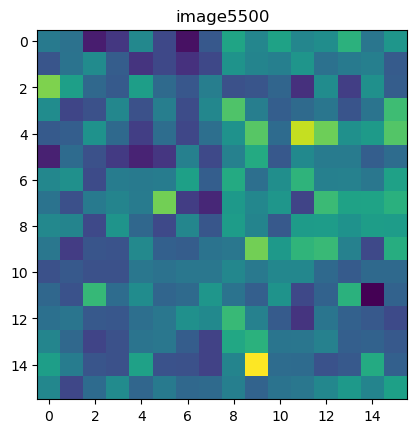

In [ ]:
from functions import image_plotter

counter = 0
for element in object_list:
    
    if element.source_ip == '192.168.3.251':
        #print(element.source_ip)
        image_plotter(element)

        time.sleep(0.0167)
        clear_output(wait=True)

        counter += 1